<a href="https://colab.research.google.com/github/cordeiroraylle/Calculo-Numerico/blob/master/Regress%C3%A3o_Linear_MN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Regressão Linear
Métodos Numéricos - 2019.2

Raylle Cordeiro - 20172610014
  


**Fonte:** https://www.kaggle.com/taniaj/gender-development-inequality

**Descrição:** De acordo com o Relatório de Desenvolvimento Humano, pelo Programa de Desenvolvimento das Nações Unidas, temos um dataset exibindo a relação de IDH de 188 paises e o indice de Desenvolvimento por Genero.  Esse dataset mede a disparidade do IDH por genero, quanto mais perto de 1 menor é a diferença entre homens e mulheres. Com essa analise, podemos analisar como o paises com posições mais altas no Rank de IDH possuem uma disparidade de genero menor.

Nesse caso, durante alguns anos não foi exibido dados para alguns paises, assim, para essa regressão foi utilizada essa planilha alternativa:
https://github.com/cordeiroraylle/Calculo-Numerico/blob/master/gender_development_index_4.csv


Os dados (amostra) foram coletados em 188 paises do Mundo


**Dados:**

* **HDI_Rank_2015**	- Rank de IDH em 2016

* **Country** - Paises envolvidos no estudo

* **2000**	-  Ano em que os dados de disparidade por genero são exibidos

* **2005**	-  Ano em que os dados de disparidade por genero são exibidos

* **2010**	-  Ano em que os dados de disparidade por genero são exibidos

* **2011**	-  Ano em que os dados de disparidade por genero são exibidos

* **2012**	-  Ano em que os dados de disparidade por genero são exibidos

* **2013**	-  Ano em que os dados de disparidade por genero são exibidos

* **2014**	-  Ano em que os dados de disparidade por genero são exibidos




# Importando bibliotecas


In [0]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

# Importando o dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving gender_development_index_4.csv to gender_development_index_4.csv


In [0]:
dados = pd.read_csv("gender_development_index_4.csv")

#Visualisando dados

In [5]:
dados

,HDI_Rank_2015,Country,2000,2005,2010,2011,2012,2013,2014,ano_2015
0,169,Afghanistan,0.282,0.481,0.580,0.594,0.602,0.607,0.609,0.609
1,75,Albania,0.936,0.944,0.959,0.957,0.960,0.960,0.960,0.959
2,83,Algeria,0.788,0.815,0.845,0.845,0.845,0.847,0.849,0.854
3,45,Argentina,0.981,1.001,0.998,0.987,0.989,0.989,0.983,0.982
4,84,Armenia,0.947,0.976,1.002,1.003,1.000,0.998,0.995,0.993
5,2,Australia,0.962,0.969,0.977,0.977,0.979,0.979,0.979,0.978
6,24,Austria,0.933,0.936,0.944,0.947,0.950,0.953,0.955,0.957
7,78,Azerbaijan,0.951,0.922,0.950,0.945,0.941,0.943,0.956,0.940
8,47,Bahrain,0.932,0.956,0.968,0.969,0.970,0.971,0.971,0.970
9,139,Bangladesh,0.835,0.868,0.904,0.916,0.970,0.925,0.926,0.927


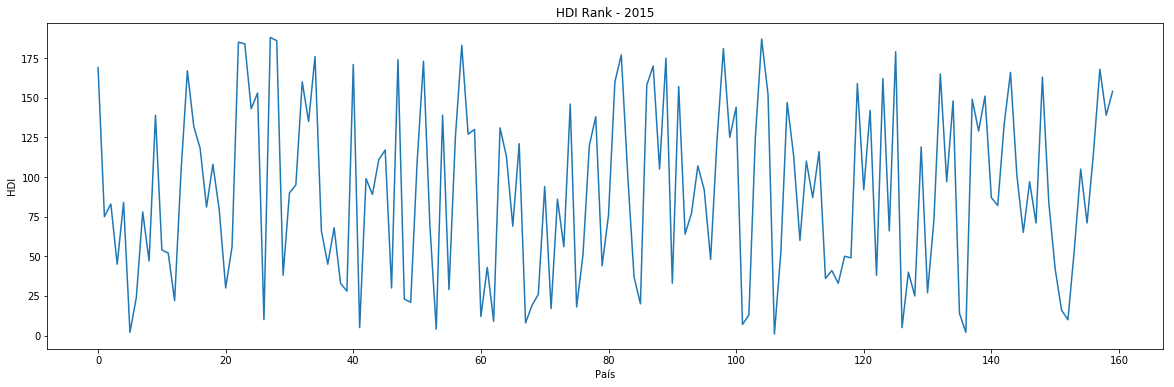

In [6]:
plot.figure(figsize=(20,6))
plot.plot(dados['HDI_Rank_2015'])
plot.title('HDI Rank - 2015')
plot.xlabel('País')
plot.ylabel('HDI')
plot.show()

In [0]:
dados.describe().round(2)

,HDI_Rank_2015,2000,2005,2010,2011,2012,2013,2014,ano_2015
count,160.00,137.00,149.00,156.00,157.00,158.00,159.00,159.00,160.00
mean,91.22,0.90,0.91,0.93,0.93,0.93,0.93,0.93,0.93
std,55.13,0.10,0.09,0.08,0.08,0.07,0.07,0.07,0.07
min,1.00,0.28,0.48,0.58,0.59,0.60,0.61,0.61,0.61
25%,42.75,0.84,0.85,0.89,0.89,0.90,0.90,0.90,0.90
50%,89.50,0.94,0.94,0.95,0.96,0.96,0.96,0.96,0.96
75%,139.00,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
max,188.00,1.04,1.04,1.04,1.04,1.03,1.03,1.03,1.03


In [0]:
from sklearn import metrics

In [0]:
import seaborn as sns

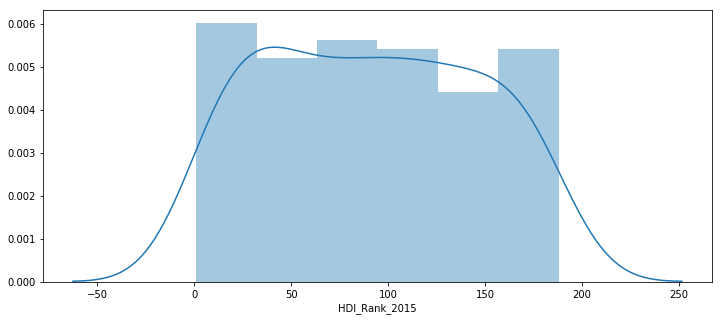

In [9]:
ax = sns.distplot(dados['HDI_Rank_2015'])
ax.figure.set_size_inches(12,5)

In [11]:
dados.corr().round(4)

,HDI_Rank_2015,2000,2005,2010,2011,2012,2013,2014,ano_2015
HDI_Rank_2015,1.0000,-0.6909,-0.7224,-0.6817,-0.6846,-0.6745,-0.6721,-0.6701,-0.6656
2000,-0.6909,1.0000,0.9829,0.9680,0.9659,0.9599,0.9607,0.9611,0.9585
2005,-0.7224,0.9829,1.0000,0.9860,0.9766,0.9705,0.9708,0.9693,0.9666
2010,-0.6817,0.9680,0.9860,1.0000,0.9862,0.9820,0.9818,0.9801,0.9775
2011,-0.6846,0.9659,0.9766,0.9862,1.0000,0.9971,0.9967,0.9945,0.9927
2012,-0.6745,0.9599,0.9705,0.9820,0.9971,1.0000,0.9974,0.9962,0.9950
2013,-0.6721,0.9607,0.9708,0.9818,0.9967,0.9974,1.0000,0.9986,0.9976
2014,-0.6701,0.9611,0.9693,0.9801,0.9945,0.9962,0.9986,1.0000,0.9992
ano_2015,-0.6656,0.9585,0.9666,0.9775,0.9927,0.9950,0.9976,0.9992,1.0000


# Visualizar as relações entre os dados

Com base na distribuição de dados observadas nos gráficos, podemos visualizar as diferenças entre os indices de disparidade ao longo de 15 anos com invervalo de 5 anos entre cada medição relacionadas ao Rank de IDH de 2015.

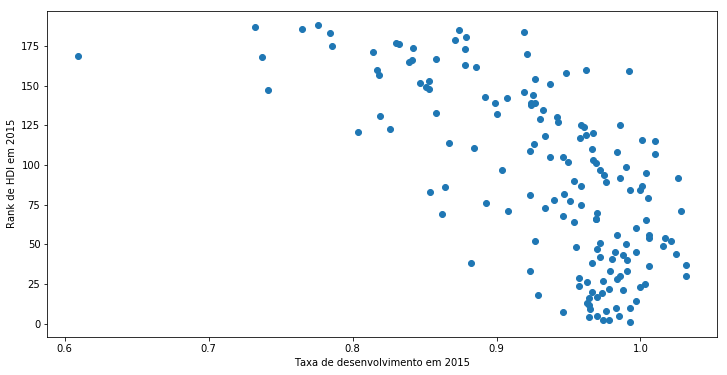

In [12]:
plot.figure(figsize=(12,6))
plot.plot(dados['ano_2015'],dados['HDI_Rank_2015'],'o')
plot.xlabel('Taxa de desenvolvimento em 2015')
plot.ylabel('Rank de HDI em 2015')
plot.show()

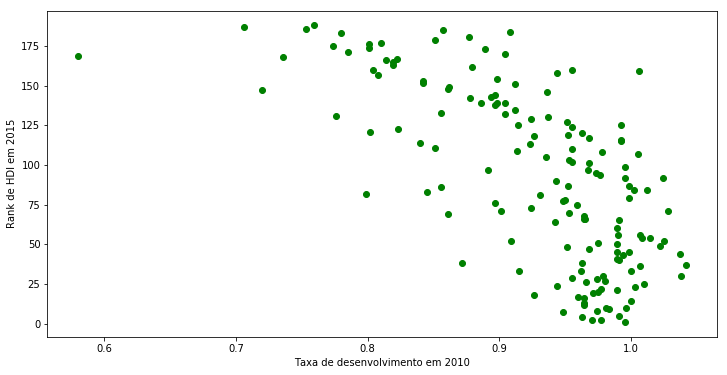

In [0]:
plot.figure(figsize=(12,6))
plot.plot(dados['2010'],dados['HDI_Rank_2015'],'go')
plot.xlabel('Taxa de desenvolvimento em 2010')
plot.ylabel('Rank de HDI em 2015')
plot.show()

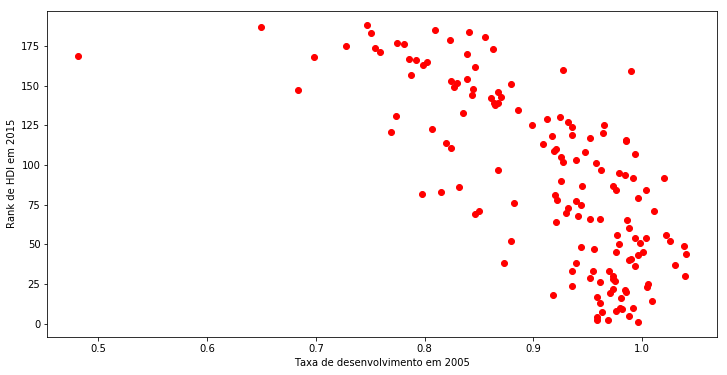

In [0]:
plot.figure(figsize=(12,6))
plot.plot(dados['2005'],dados['HDI_Rank_2015'],'or')
plot.xlabel('Taxa de desenvolvimento em 2005')
plot.ylabel('Rank de HDI em 2015')
plot.show()

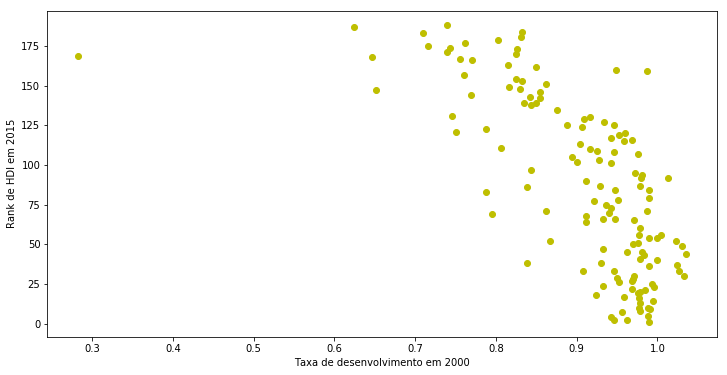

In [0]:
plot.figure(figsize=(12,6))
plot.plot(dados['2000'],dados['HDI_Rank_2015'],'oy')
plot.xlabel('Taxa de desenvolvimento em 2000')
plot.ylabel('Rank de HDI em 2015')
plot.show()

# Regressão Linear:

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

In [0]:
from sklearn import metrics

In [0]:
def coeficientes_reg_linear(x,y):
    m = x.shape[0]
    sum_xi = np.sum(x)
    sum_xi2 = np.sum(x**2)
    sum_yi = np.sum(y)
    sum_xiyi = np.sum(x*y)
    return np.linalg.solve([[m,sum_xi],[sum_xi,sum_xi2]],[sum_yi,sum_xiyi])
    

576.7178020091411 + -519.5735816291266x


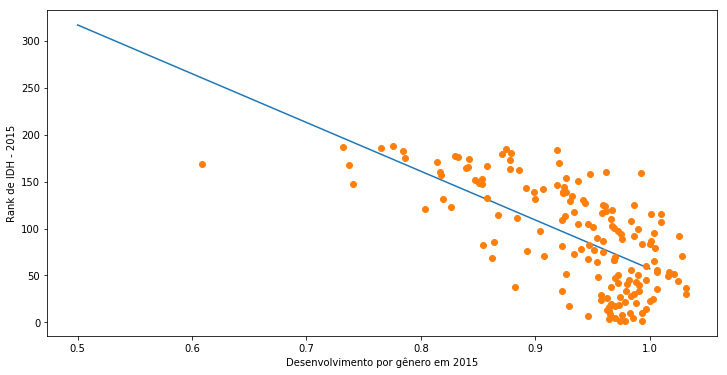

In [15]:
a0,a1 = coeficientes_reg_linear(dados['ano_2015'],dados['HDI_Rank_2015'])
temp = np.linspace(0.5,1,10)
consumo = a0+a1*temp
print(f'{a0} + {a1}x')
plot.figure(figsize=(12,6))
plot.plot(temp,consumo)
plot.plot(dados['ano_2015'],dados['HDI_Rank_2015'],'o')
plot.xlabel("Desenvolvimento por gênero em 2015")
plot.ylabel("Rank de IDH - 2015")
plot.show()

